# EDA for Lending Club Loan Data

In [1]:
%matplotlib notebook
import pandas as pd
from matplotlib import pyplot as plt
import csv
import json
import seaborn as sns
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
# allow for multiple print statements from a single cell
InteractiveShell.ast_node_interactivity = "all"

# set print options to display all columns and rows unless specified otherwise
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Ingestion
We begin by getting the paths of the dataset (loan.csv) and data dictionary (LCDataDictionary.xlsx) from config.json and then ingesting the two files from our local file system.

In [2]:
with open('config.json') as json_data_file:
    data = json.load(json_data_file)
    pathToLoanCSV = data['pathToInput']
    pathToDataDict = data['dataDict']
    


if pathToLoanCSV == "" or pathToDataDict == "":
    print('Error importing config file')
    
# convert the csv file into a pandas dataframe
loans = pd.read_csv(pathToLoanCSV,
                        sep=','
                        )
# data dictionary so we can easily access the meaning of columns
datadict = pd.read_excel(pathToDataDict)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Print all columns of the loans dataframe and all rows of the datadict dataframe.

In [3]:
list_of_cols = loans.columns.tolist()
list_of_cols
datadict_rows_list = datadict['LoanStatNew'].tolist()
datadict_rows_list

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mth

See the shape of rows and columns of loans and datadict dataframes.

In [4]:
loans.shape
datadict.shape

(2260668, 145)

(153, 2)

Since 153 > 145, let's find the missing columns that are in datadict but not in loans.

In [5]:
cols_not_in_loans = [x for x in list_of_cols if x not in datadict_rows_list]
cols_not_in_loans

['verification_status_joint',
 'total_rev_hi_lim',
 'revol_bal_joint',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog']

As a point of reference, here we can see the meaning of each of the rows from the datadict.

In [6]:
datadict.style.set_properties(subset=['Description'], **{'width':'600px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


Let's look at the first 10 rows of the loans dataset.

In [7]:
loans.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

## Counting non-null values
From the above output, we can see that there are a significant amount of null values, especially for the the id and member_id fields. Now I will use count to count the amount of non-null values in each column.

In [8]:
countDf = loans.count()
countDf.sort_values()

id                                                  0
member_id                                           0
url                                                 0
orig_projected_additional_accrued_interest       8426
hardship_reason                                 10613
hardship_status                                 10613
deferral_term                                   10613
hardship_amount                                 10613
hardship_start_date                             10613
hardship_end_date                               10613
payment_plan_start_date                         10613
hardship_dpd                                    10613
hardship_type                                   10613
hardship_loan_status                            10613
hardship_payoff_balance_amount                  10613
hardship_last_payment_amount                    10613
hardship_length                                 10613
debt_settlement_flag_date                       33056
settlement_status           

We can see that url, id, and member_id are all 0, thus in our final dataset we will not need to ingest these columns. It appears that they originally existed in the dataset, but have since been removed perhaps for security purposes.

We can also observe that many columns null values, considering that their counts are << than 2260668. Thus next I will collect the counts that appear more than 3 times and then filter the dataset from there.

In [9]:
# get the counts that appeared more than 3 times 
arr = [value for value in countDf]
c = Counter(arr)
missing_greater3 = []
for count in c:
    if c[count] > 3:
        missing_greater3.append(count)
missing_greater3.sort()
missing_greater3
# see the % missing from counts that appeared greater than 3 times
percent_missing = [100-(x/2260668)*100 for x in missing_greater3]
percent_missing

[10613, 33056, 108021, 1394539, 2190392, 2210638, 2260639, 2260668]

[99.53053699172104,
 98.53777732953269,
 95.22172207506807,
 38.312967671502406,
 3.10863868555667,
 2.2130626876657686,
 0.0012828066748369338,
 0.0]

In [10]:
# filter out the rows that were missing > 90% of potential values
# these can be stored in a separate table later
cols_to_separate_out = countDf[countDf <= 108021]
cols_to_separate_out

id                                                 0
member_id                                          0
url                                                0
revol_bal_joint                               108020
sec_app_earliest_cr_line                      108021
sec_app_inq_last_6mths                        108021
sec_app_mort_acc                              108021
sec_app_open_acc                              108021
sec_app_revol_util                            106184
sec_app_open_act_il                           108021
sec_app_num_rev_accts                         108021
sec_app_chargeoff_within_12_mths              108021
sec_app_collections_12_mths_ex_med            108021
sec_app_mths_since_last_major_derog            35942
hardship_type                                  10613
hardship_reason                                10613
hardship_status                                10613
deferral_term                                  10613
hardship_amount                               

## Exploring Data Types
Next we will have a look at data types, to see which features are continuous and which are categorical.

In [11]:
loans.dtypes.sort_values()

policy_code                                     int64
loan_amnt                                       int64
funded_amnt                                     int64
revol_bal                                       int64
mort_acc                                      float64
mths_since_recent_bc                          float64
mths_since_recent_bc_dlq                      float64
mths_since_recent_inq                         float64
mths_since_recent_revol_delinq                float64
num_accts_ever_120_pd                         float64
num_actv_rev_tl                               float64
num_bc_sats                                   float64
num_bc_tl                                     float64
num_il_tl                                     float64
num_op_rev_tl                                 float64
num_rev_accts                                 float64
num_actv_bc_tl                                float64
mo_sin_rcnt_tl                                float64
id                          

It appears we have mostly continuous features (float64, int64), and some categorical data (object). From the description of some the categorical data from the data dictionary, we can observer that certain features should only have certain values. Now we can check to see if these features have <= the amount of unique values allowed for those columns.

In [12]:

# should be <= 2
print('policy code: max 2')
loans['policy_code'].nunique()
# should be <= 6
print('settlement status: max 6')
loans['settlement_status'].nunique()
# should be <= 2
print('disbursement method: max 2')
loans['disbursement_method'].nunique()
# should be <= 2
print('initial_list_status: max 2')
loans['initial_list_status'].nunique()
# should be <= 4
print('home_ownership: max 4')
loans['home_ownership'].nunique()
# should be <= 11
print('emp_length: max 11')
loans['emp_length'].nunique()

policy code: max 2


1

settlement status: max 6


3

disbursement method: max 2


2

initial_list_status: max 2


2

home_ownership: max 4


6

emp_length: max 11


11

Great! Our variables with fixed values appear to have the correct number of unique values.

## Finding Duplicate Rows
Next I wanted to see if I could find any duplicate rows that could be deleted before inserting into the database.

In [13]:
duplicatedRowsDF = loans[loans.duplicated()]
duplicatedRowsDF

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


Because the above output was null, I wanted to ensure that the .duplicated() method was working correctly, so I performed a similar method below. After dropping duplicates, if there were any the number of rows should be less than before (2260668, 145).

In [14]:
loans.drop_duplicates(inplace= True)
loans.shape

(2260668, 145)

Since it is the same, we can conclude that there were no duplicate rows.

# Data Visualization

Now we can move on to exploring the trends in the data.

Let's look at the loan amounts over all time

In [12]:
# df_sorted = df.sort_values(by=['Date'], ascending=True)
# issue_d = The month which the loan was funded
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [13]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)
loans['issue_d'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [14]:
sorted_date_amnt = loans[['issue_d','loan_amnt']].sort_values(by=['issue_d'], ascending=True)
sorted_date_amnt.head()

,issue_d,loan_amnt
2142001,2007-06-01,1400
2142017,2007-06-01,2525
2142016,2007-06-01,1000
2142015,2007-06-01,3500
2142014,2007-06-01,6500


In [15]:
sorted_date_amnt['loan_amnt_cumsum'] = sorted_date_amnt['loan_amnt'].cumsum()
sorted_date_amnt.head()

,issue_d,loan_amnt,loan_amnt_cumsum
2142001,2007-06-01,1400,1400
2142017,2007-06-01,2525,3925
2142016,2007-06-01,1000,4925
2142015,2007-06-01,3500,8425
2142014,2007-06-01,6500,14925


<IPython.core.display.Javascript object>


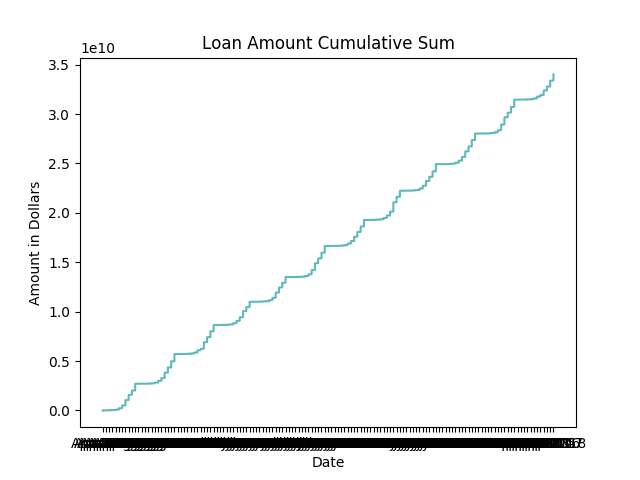

Text(0.5, 1.0, 'Loan Amount Cumulative Sum')

Text(0, 0.5, 'Amount in Dollars')

Text(0.5, 0, 'Date')

In [11]:
# cumsumDf = cumsumDF.sort_values(by=['issue_d'], ascending=True)
ax = sns.lineplot(x="issue_d",y="loan_amnt_cumsum", data=sorted_date_amnt, palette='spring', estimator=None, color="#61B8BB")
plt.title('Loan Amount Cumulative Sum')
plt.ylabel('Amount in Dollars')
plt.xlabel('Date')
plt.show()